In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3414,ham,He remains a bro amongst bros,NaN,NaN,NaN
5057,ham,"Geeeee ... Your internet is really bad today, ...",NaN,NaN,NaN
2156,ham,Hey cutie. How goes it? Here in WALES its kind...,NaN,NaN,NaN
659,spam,88800 and 89034 are premium phone services cal...,NaN,NaN,NaN
4844,ham,Missing you too.pray inshah allah,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# 5 Stages for this project
1. Data cleaning
2. EDA
3. Text-Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deployment 

In [6]:
#1 Data cleaning


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df1=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [9]:
df1.sample(2)

,v1,v2
4473,spam,Want explicit SEX in 30 secs? Ring 02073162414...
1803,ham,I'm in class. Did you get my text.


In [10]:
# renaming the cols

In [11]:
df1.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [12]:
df1.sample(2)

,Target,Text
1815,ham,Sian... Aft meeting supervisor got work 2 do l...
5184,ham,I'm in town now so i'll jus take mrt down later.


In [13]:
# Now we can apply label encoder for ham and spam in Target col

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df1['Target']=encoder.fit_transform(df1['Target'])

In [16]:
df1.sample(2)

,Target,Text
5470,0,I thought slide is enough.
1624,1,500 free text msgs. Just text ok to 80488 and ...


In [17]:
# missing values

In [18]:
df1.isnull().sum()

Target    0
Text      0
dtype: int64

In [19]:
# Checking for duplicate values

In [20]:
df1.duplicated().sum()

np.int64(403)

In [21]:
#remove duplicates
df1=df1.drop_duplicates(keep='first')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   int64 
 1   Text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


## 2 EDA

In [23]:
df1['Target'].value_counts()
#we can see the data is imbalanced

Target
0    4516
1     653
Name: count, dtype: int64

<Axes: ylabel='count'>

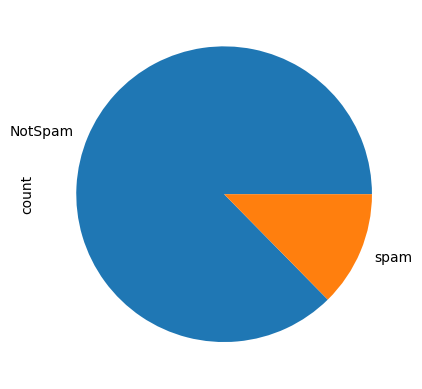

In [24]:
#using inbuilt Pandas
df1['Target'].value_counts().plot(kind='pie',labels=['NotSpam','spam'])

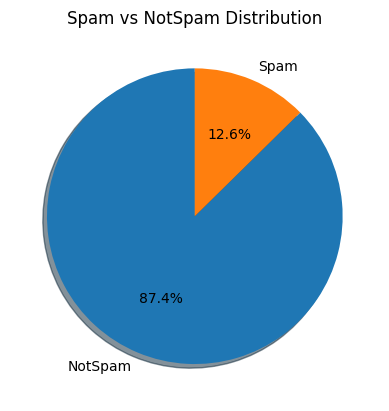

In [25]:
import matplotlib.pyplot as plt

counts = df1['Target'].value_counts()
plt.pie(counts, labels=['NotSpam', 'Spam'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Spam vs NotSpam Distribution')
plt.show()


In [26]:
# TO remember Data is Imbalanced

In [27]:
!pip install nltk

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
df1['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [32]:
df1['num_characters']=df1['Text'].apply(len)

In [33]:
df1.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
#Number of words 
df1['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [35]:
df1['num_words']=df1['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
#Num of sentences
df1['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [37]:
df1['num_sentences']=df1['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df1.sample(5)

,Target,Text,num_characters,num_words,num_sentences
5379,0,Somebody set up a website where you can play h...,80,15,1
1739,0,U guys never invite me anywhere :(,34,8,1
1209,0,His bday real is in april .,27,7,1
481,0,"Yo carlos, a few friends are already asking me...",90,20,1
1149,0,Not a drop in the tank,22,6,1


In [39]:
df1[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# now we can seperately see describe func. for spam and ham 

In [41]:
map1=df1['Target']==0 # Not spam

In [42]:
df1[map1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
map2=df1['Target']==1 # spam
df1[map2][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [44]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

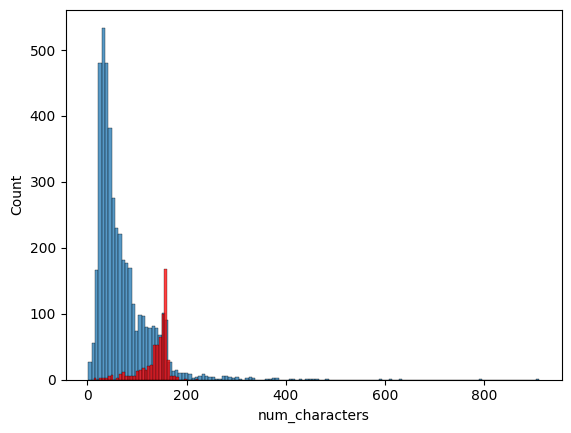

In [45]:
sns.histplot(df1[map1]['num_characters'])
sns.histplot(df1[map2]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

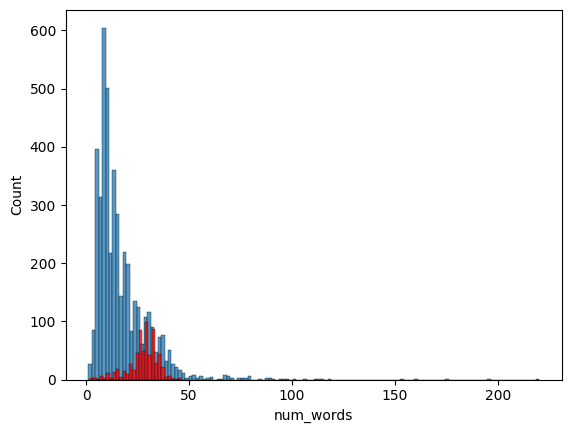

In [46]:
sns.histplot(df1[map1]['num_words'])
sns.histplot(df1[map2]['num_words'],color='red')

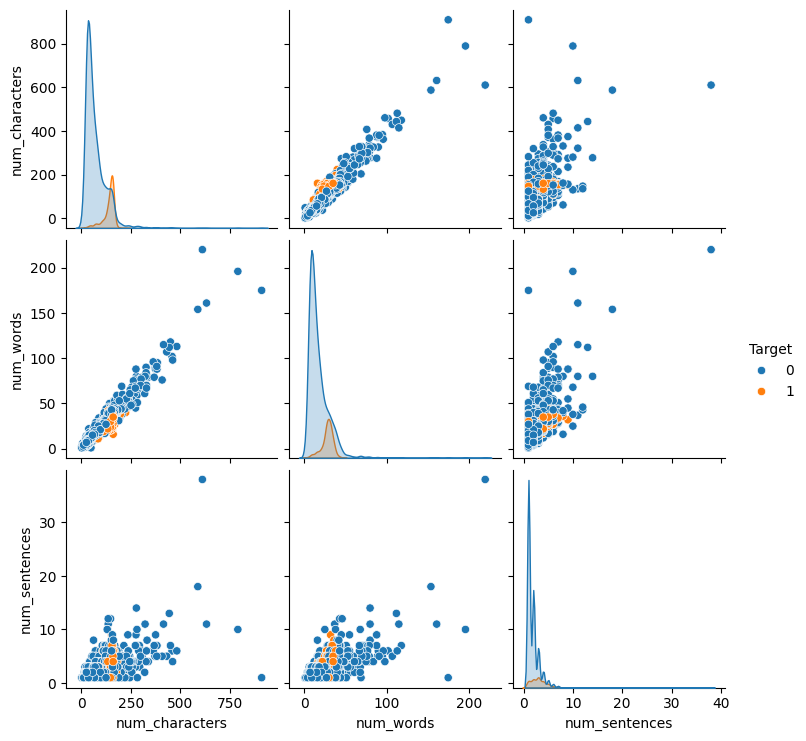

In [47]:
sns.pairplot(df1,hue='Target')

In [48]:
df1.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

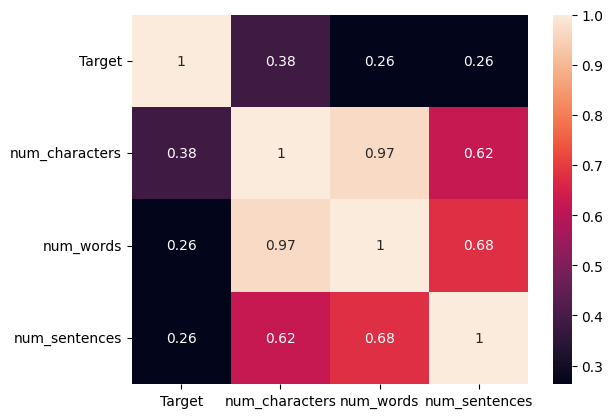

In [49]:
sns.heatmap(df1[['Target','num_characters','num_words','num_sentences']].corr(),annot=True)

## Data/Text Preprocessing
 1.Lower case
 2.Tokenization
 3.Removing special characters
 4.Removing stop words and punctuation
 5.stemming (dance,~dancing,~danced=>dance)

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    return y
    

In [50]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

def transform_text(text):
    text = text.lower()                       # Convert to lowercase
    text = nltk.word_tokenize(text)          # Split into words and punctuation
    y = []
    for i in text:
        if i.isalnum():                      # Keep only words/numbers, skip punctuation
            y.append(i)
    text = y[:]                              # Store the clean words in 'text'
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
            
    return y
    

transform_text("HOW ARE yo1 amit ! @ . ?") #['yo1', 'amit']

In [52]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
            
    return y
    

In [53]:

df1['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [54]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

In [55]:
transform_text(df1['Text'][2000]) #['b', 'go', '2', 'sch', 'mon', 'si', 'need', '2', 'take', 'smth']

'b go 2 sch mon si need 2 take smth'

In [56]:
#Now removing stopwords and punctuations
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
# Stemming

In [58]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [59]:
# THe function was meant to be for a new col. transformerd_text

In [60]:
df1['Text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [61]:
df1['Transformed_text']=df1['Text'].apply(transform_text)

In [134]:
df1.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
# now we'll see the wordcloud =>it'll show imp words in big pic

In [64]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [65]:
map3=df1['Target']==1

In [66]:
spam_wc=wc.generate(df1[map3]['Transformed_text'].str.cat(sep=' '))
#concatenates all (spam)strings in a Series into one single string

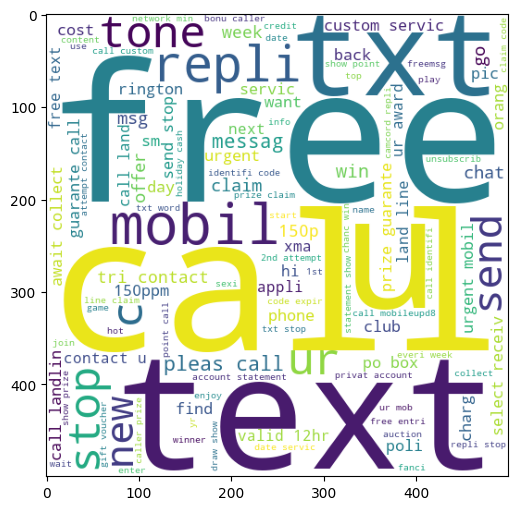

In [67]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [68]:
map4=df1['Target']==0

In [69]:
ham_wc=wc.generate(df1[map4]['Transformed_text'].str.cat(sep=' '))

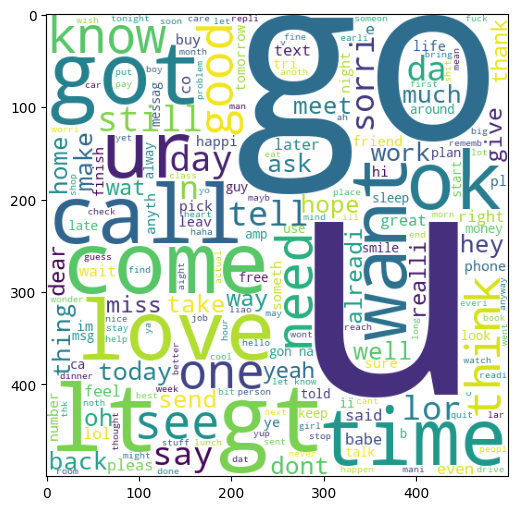

In [70]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [71]:
# now we need to pick the top words which will decide whether spam or not 
# depending on its counts

In [72]:
df1[map3]['Transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [73]:
spam_corpus=[]
for msg in df1[map3]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [101]:
len(spam_corpus)
#len() counts unique item in list 
#df.unique() calcs for df

9939

In [75]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

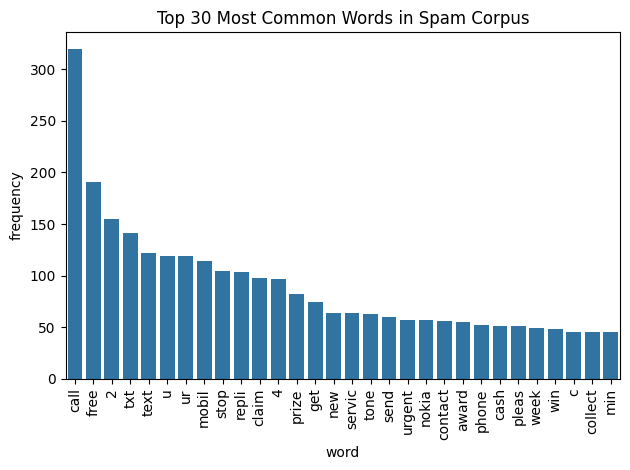

In [76]:
from collections import Counter
# Count the most common words
word_counts = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df2 = pd.DataFrame(word_counts, columns=['word', 'frequency'])

# Plot
sns.barplot(x='word', y='frequency', data=df2)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.tight_layout()
plt.show()

In [77]:
ham_corpus=[]
for msg in df1[map4]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [78]:
len(ham_corpus)

35404

In [135]:
df1['Transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Transformed_text, Length: 5169, dtype: object

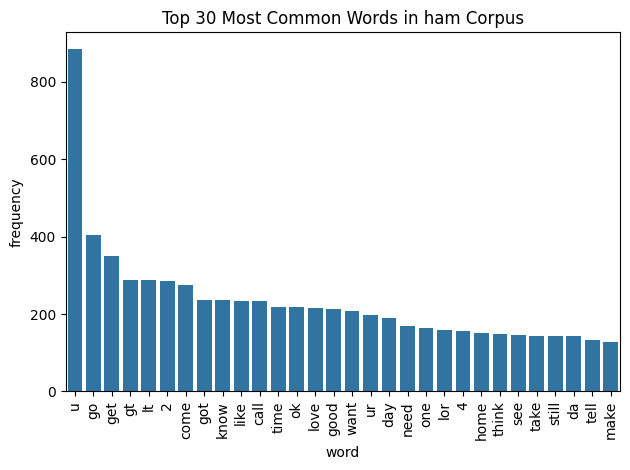

In [79]:
from collections import Counter
# Count the most common words
word_counts2 = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df3 = pd.DataFrame(word_counts2, columns=['word', 'frequency'])

# Plot
sns.barplot(x='word', y='frequency', data=df3)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in ham Corpus")
plt.tight_layout()
plt.show()

# MODEL Building


In [136]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#cv=CountVectorizer() I used this first i didnt get precisin 1 so now will try tfid
tfidf=TfidfVectorizer()
#tfidf=TfidfVectorizer(max_features=3000) furthue as part of model improv

In [137]:
#X=cv.fit_transform(df1['Transformed_text']).toarray() slight change to improve precision

X=tfidf.fit_transform(df1['Transformed_text']).toarray()

In [138]:
X.shape

(5169, 6708)

In [139]:
y=df1['Target'].values

In [140]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [143]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [144]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [145]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [146]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#0.9642166344294004
#[[871  25]
# [ 12 126]]        =>with CountVectorizer
#0.8344370860927153

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [147]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [92]:
# Agar data imbalace ho to imptance => precision 

In [93]:
#we'll choose tfidf-mnb

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [149]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [150]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [151]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.971953578336557, np.float64(1.0))

In [108]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    curr_acc,curr_prec=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("for",name)
    print("Accuracy-",curr_acc)
    print("Precision-",curr_prec)
    accuracy_scores.append(curr_acc)
    precision_scores.append(curr_prec)
    
    

for SVC
Accuracy- 0.9729206963249516
Precision- 0.9741379310344828
for KN
Accuracy- 0.9003868471953579
Precision- 1.0
for NB
Accuracy- 0.9593810444874274
Precision- 1.0
for DT
Accuracy- 0.9352030947775629
Precision- 0.8380952380952381
for LR
Accuracy- 0.9516441005802708
Precision- 0.94
for RF
Accuracy- 0.971953578336557
Precision- 1.0


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for AdaBoost
Accuracy- 0.9613152804642167
Precision- 0.9454545454545454
for BgC
Accuracy- 0.9584139264990329
Precision- 0.8625954198473282
for ETC
Accuracy- 0.9729206963249516
Precision- 0.9824561403508771
for GBDT
Accuracy- 0.9526112185686654
Precision- 0.9238095238095239
for xgb
Accuracy- 0.9748549323017408
Precision- 0.9516129032258065


In [118]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision',ascending=False)


In [119]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.974855,0.951613
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


# Model IMporovement

In [117]:
# 1. change the max_features paramenter of Tfidf
# use only highly used words from corpus

In [120]:
# Voting classifier
from sklearn.ensemble import VotingClassifier

In [122]:
voting=VotingClassifier(estimators=[('KN', knc),('NB', mnb),('RF', rfc)],voting='soft')


In [123]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('KN', KNeighborsClassifier()),
                             ('NB', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [124]:
y_pred=voting.predict(X_test)

In [125]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

In [127]:
print("accuracy",accuracy)
print("precision",precision)
#Not always helpful

accuracy 0.9410058027079303
precision 1.0


In [129]:
#applying stacking
from sklearn.ensemble import StackingClassifier
estimators=[('KN', knc),('NB', mnb),('RF', rfc)]
final_estimator=RandomForestClassifier()

In [130]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [131]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('KN', KNeighborsClassifier()),
                               ('NB', MultinomialNB()),
                               ('RF',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2))],
                   final_estimator=RandomForestClassifier())

In [132]:
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precision 0.8913043478260869


In [133]:
#Pipelining
# If an email comes:
# step 1 -> preprocess
# step 2 -> vectorize
# step 3 -> apply algo


In [152]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))